In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

parse_dates = pd.to_datetime
portWeather2024 = pd.read_csv('..\\Data\\PortlandWeather2024.csv',parse_dates=[5]) # 2 years of past Portland Maine weather
portWeather2023 = pd.read_csv('..\\Data\\PortlandWeather2023.csv',parse_dates=[5])
portWeather2023[["DATE", "TMAX"]] # We only want temperature and date
merge = pd.merge_ordered(portWeather2023, portWeather2024) # put them together to graph the full two years
merge


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,...,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-01,7.61,",,W",NaN,NaN,...,40.0,",,W",310.0,",,W",300.0,",,W",23.0,",,W",31.1,",,W"
1,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-02,2.91,",,W",NaN,NaN,...,29.0,",,W",120.0,",,W",260.0,",,W",8.9,",,W",12.1,",,W"
2,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-03,3.80,",,W",NaN,NaN,...,25.0,",,W",350.0,",,W",350.0,",,W",12.1,",,W",14.1,",,W"
3,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-04,4.70,",,W",NaN,NaN,...,36.0,",,W",50.0,",,W",50.0,",,W",16.1,",,W",21.0,",,W"
4,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2023-01-05,10.51,",,W",NaN,NaN,...,28.0,",,W",60.0,",,W",60.0,",,W",19.9,",,W",25.1,",,W"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2024-11-23,NaN,NaN,NaN,NaN,...,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2024-11-24,NaN,NaN,NaN,NaN,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2024-11-25,NaN,NaN,NaN,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,USW00014764,"PORTLAND JETPORT, ME US",43.64244,-70.30443,13.5,2024-11-26,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


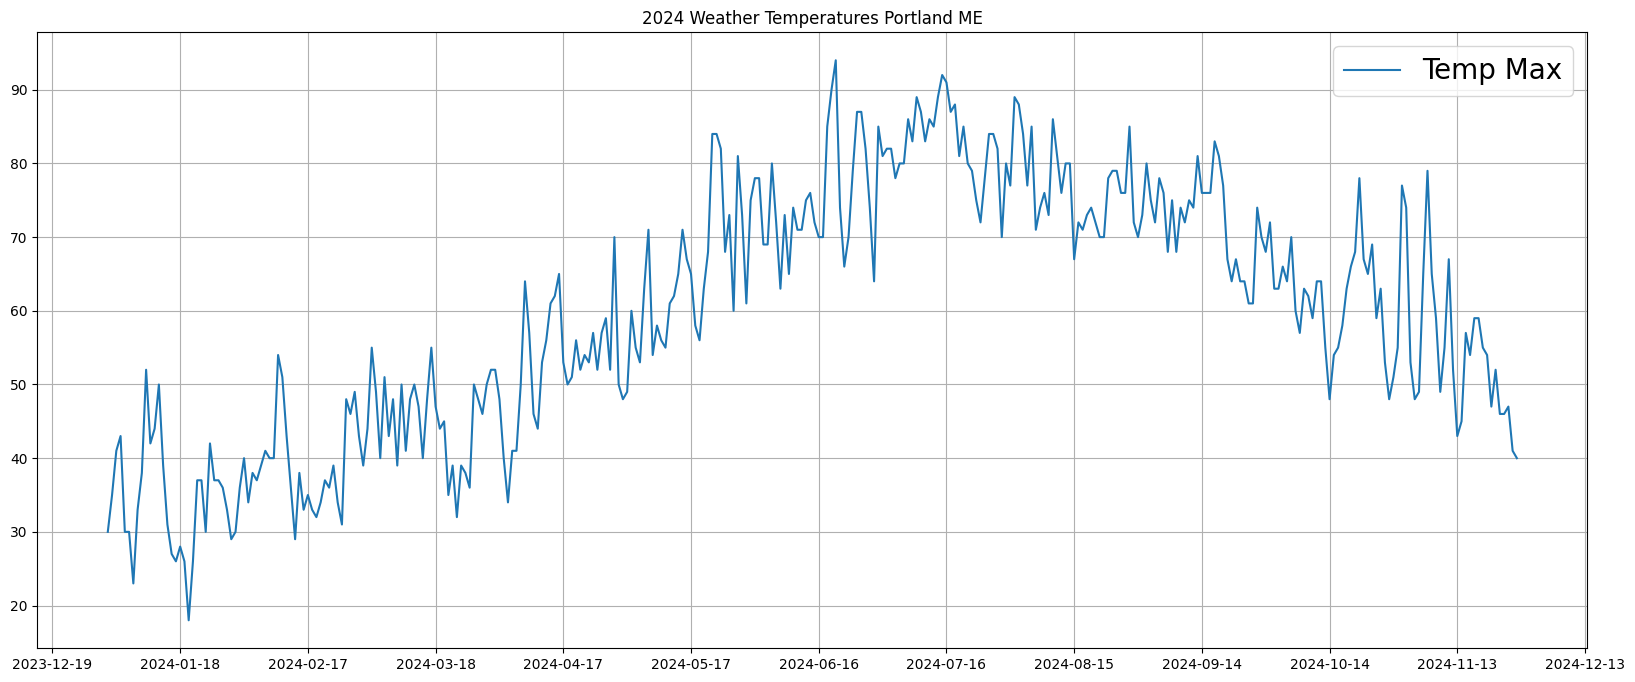

In [2]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(portWeather2024['DATE'], portWeather2024['TMAX'], label = "Temp Max")
ax.xaxis.set_major_locator(MultipleLocator(30))
plt.title("2024 Weather Temperatures Portland ME")
plt.legend(fontsize = 20)
plt.show()


In [16]:
# Train data omitting november in an attempt to predict november 2024s weather even though we already know what it is
# this allows us to see how efective our models predictions are
model = SARIMAX(merge['TMAX'][:len(merge)-7], order = (5, 1, 0), seasonal_order =(2, 1, 1, 30)) 

result = model.fit() 

forecastNov = result.predict(start = len(merge)-7,  end = len(merge),  typ = 'linear')

g:\Data_SCIENCE\DATA_SCIENCE_6150\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


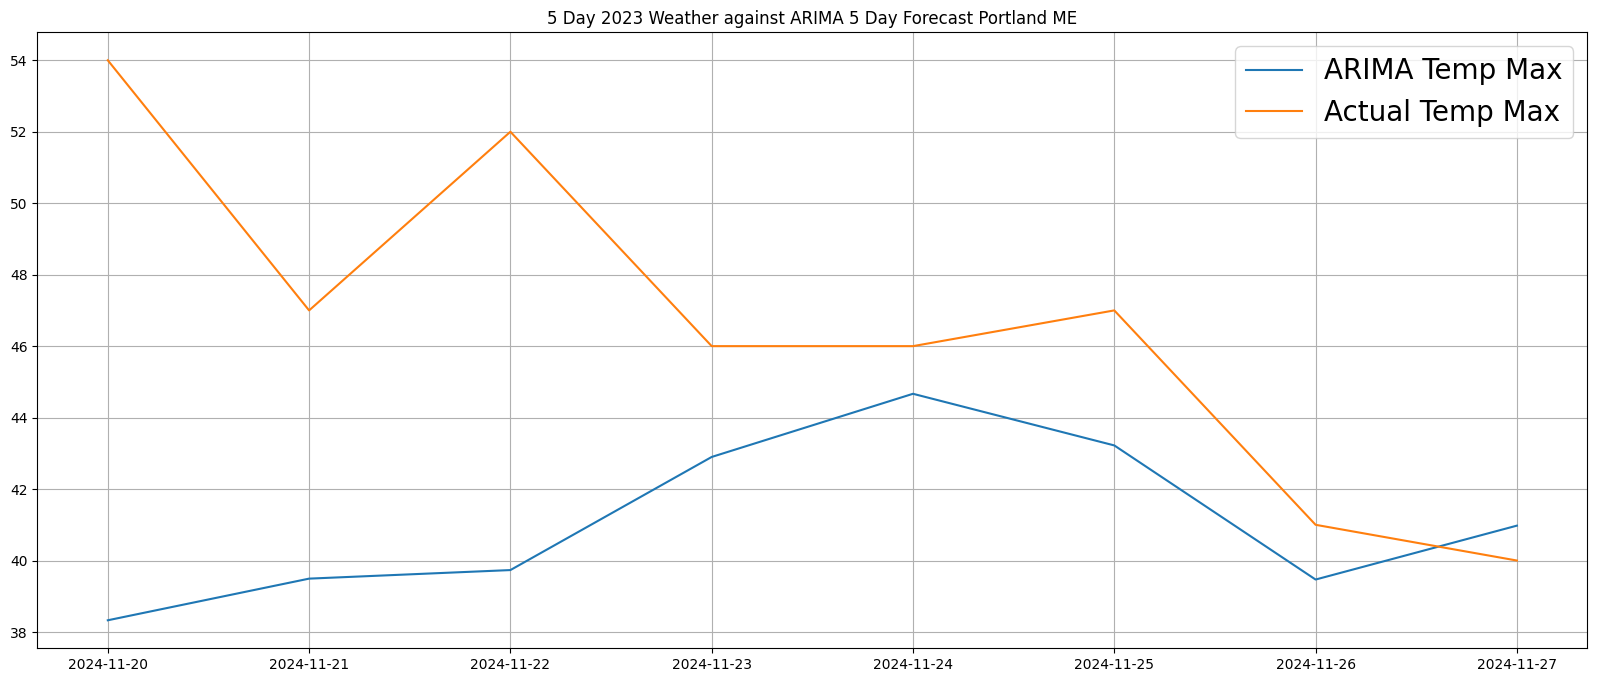

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(merge['DATE'][len(merge)-8:], forecastNov, label = "ARIMA Temp Max")
plt.plot(merge['DATE'][len(merge)-8:], merge['TMAX'][len(merge)-8:], label = "Actual Temp Max")
plt.title("5 Day 2023 Weather against ARIMA 5 Day Forecast Portland ME")
plt.legend(fontsize = 20)
plt.show()

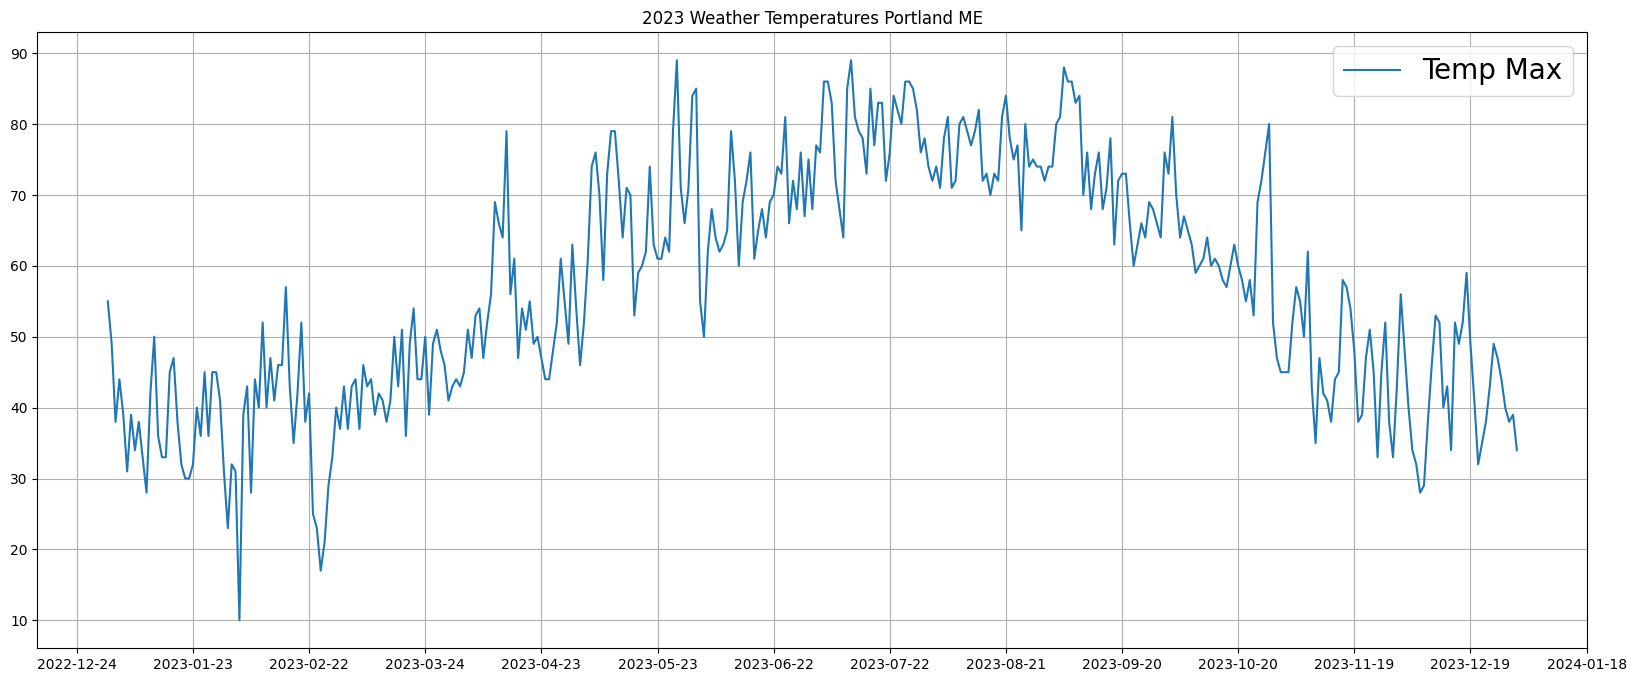

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(portWeather2023['DATE'], portWeather2023['TMAX'], label = "Temp Max")
ax.xaxis.set_major_locator(MultipleLocator(30))
plt.title("2023 Weather Temperatures Portland ME")
plt.legend(fontsize = 20)
plt.show()

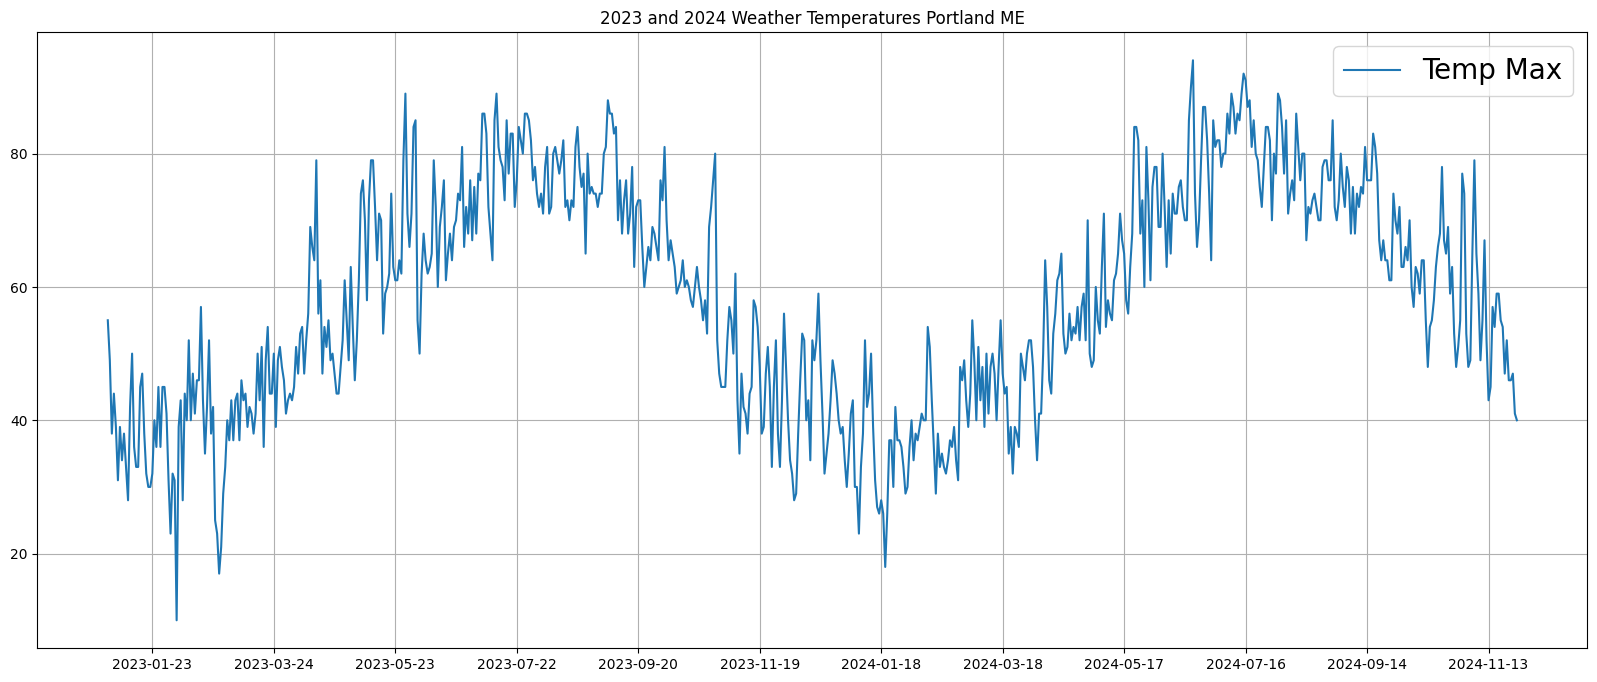

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(merge['DATE'], merge['TMAX'], label = "Temp Max")
ax.xaxis.set_major_locator(MultipleLocator(60))
plt.title("2023 and 2024 Weather Temperatures Portland ME")
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# Train data omitting november in an attempt to predict november 2024s weather even though we already know what it is
# this allows us to see how efective our models predictions are
model = SARIMAX(merge["TMAX"][:len(merge)-31], order = (5, 1, 0), seasonal_order =(2, 1, 1, 30)) 

result = model.fit() 

forecastNov = result.predict(start = len(merge)-31,  end = len(merge),  typ = 'linear')



g:\Data_SCIENCE\DATA_SCIENCE_6150\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


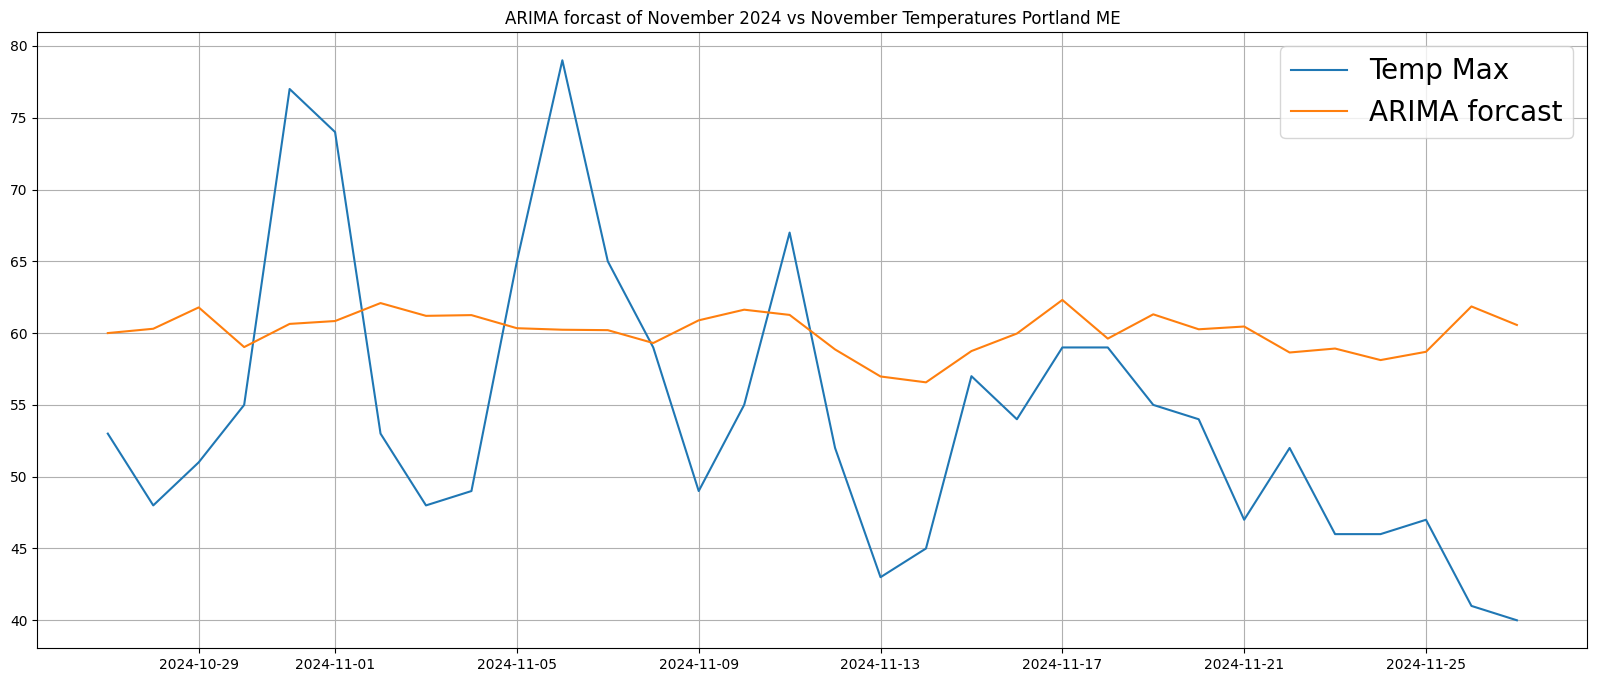

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(merge["DATE"][665:len(merge)], merge["TMAX"][665:len(merge)],label = "Temp Max") 
plt.plot(merge["DATE"][665:len(merge)],forecastNov, label = "ARIMA forcast")
plt.title("ARIMA forcast of November 2024 vs November Temperatures Portland ME")
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# Model all our data for a future prediction
model = SARIMAX(merge["TMAX"][:len(merge)], order = (5, 1, 0), seasonal_order =(2, 1, 1, 30)) 

result = model.fit() 

# Predict the next month (December 2024)
forecastDec = result.predict(start = len(merge),  end = len(merge) + 31,  typ = 'linear')

g:\Data_SCIENCE\DATA_SCIENCE_6150\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
dates = []
time = pd.Timestamp(year = 2024, day = 27, month = 11) # Data ends here so we begin our forcast here
for x in forecastDec: # Get dates for each forcasted day
    dates.append(time)
    time = time + timedelta(days=1)
dates

[Timestamp('2024-11-27 00:00:00'),
 Timestamp('2024-11-28 00:00:00'),
 Timestamp('2024-11-29 00:00:00'),
 Timestamp('2024-11-30 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2024-12-02 00:00:00'),
 Timestamp('2024-12-03 00:00:00'),
 Timestamp('2024-12-04 00:00:00'),
 Timestamp('2024-12-05 00:00:00'),
 Timestamp('2024-12-06 00:00:00'),
 Timestamp('2024-12-07 00:00:00'),
 Timestamp('2024-12-08 00:00:00'),
 Timestamp('2024-12-09 00:00:00'),
 Timestamp('2024-12-10 00:00:00'),
 Timestamp('2024-12-11 00:00:00'),
 Timestamp('2024-12-12 00:00:00'),
 Timestamp('2024-12-13 00:00:00'),
 Timestamp('2024-12-14 00:00:00'),
 Timestamp('2024-12-15 00:00:00'),
 Timestamp('2024-12-16 00:00:00'),
 Timestamp('2024-12-17 00:00:00'),
 Timestamp('2024-12-18 00:00:00'),
 Timestamp('2024-12-19 00:00:00'),
 Timestamp('2024-12-20 00:00:00'),
 Timestamp('2024-12-21 00:00:00'),
 Timestamp('2024-12-22 00:00:00'),
 Timestamp('2024-12-23 00:00:00'),
 Timestamp('2024-12-24 00:00:00'),
 Timestamp('2024-12-

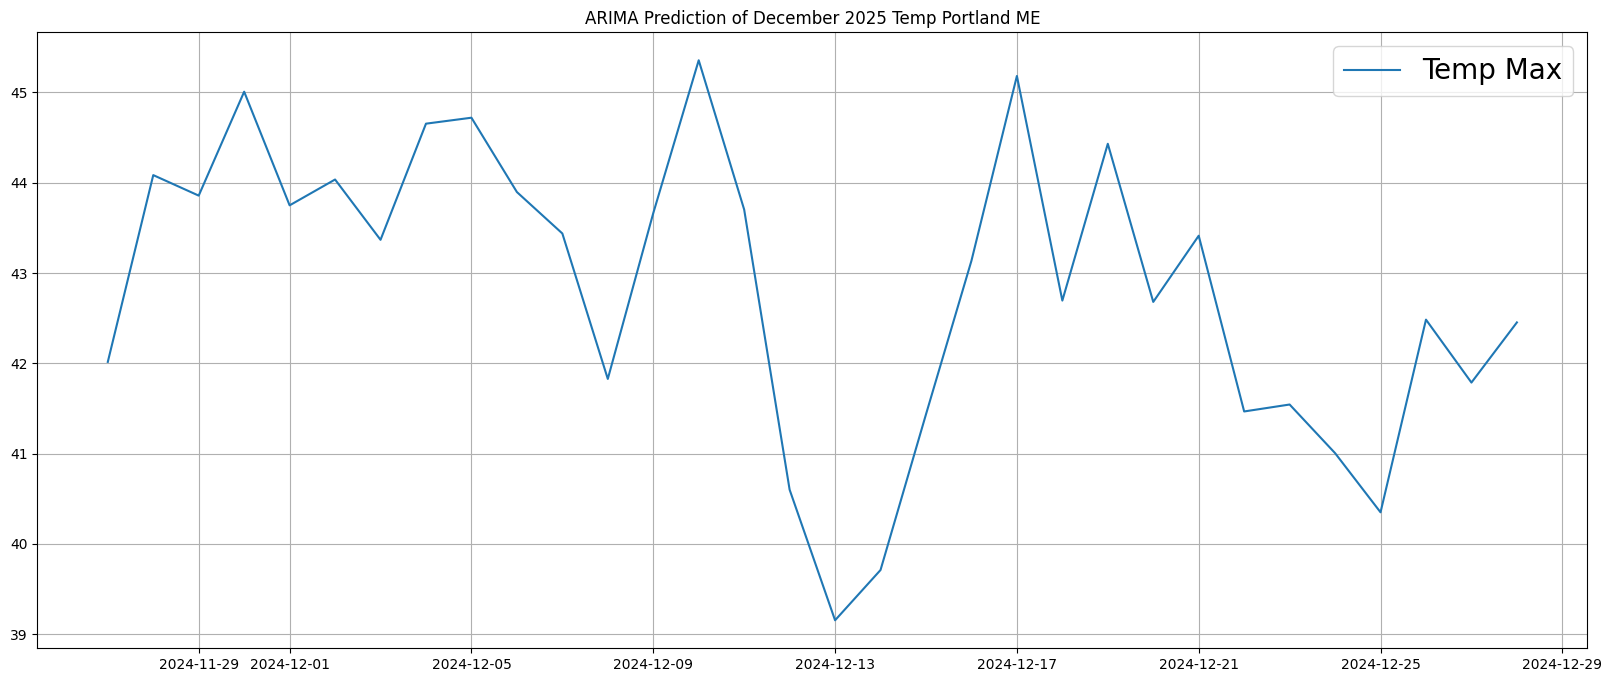

In [ ]:
# Plot our model prediction for december 2024 against dates
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(dates, forecastDec, label = "Temp Max")
plt.title("ARIMA Prediction of December 2024 Temp Portland ME")
plt.legend(fontsize = 20)
plt.show()

In [146]:
# Get our tomorrow IO prediction of the next 5 days of real time.
with open('..\\Data\\PortlandForcast.json', encoding='utf-8') as inputfile:
    IOdata = pd.read_json("..\\Data\\PortlandForcast.json")

IOdata = pd.DataFrame(IOdata.timelines.daily)
IOdata

,time,values
0,2024-12-07T01:00:00Z,"{'cloudBaseAvg': 0.06, 'cloudBaseMax': 0.14, '..."
1,2024-12-08T01:00:00Z,"{'cloudBaseAvg': 0.02, 'cloudBaseMax': 0.03, '..."
2,2024-12-09T01:00:00Z,"{'cloudBaseAvg': 0, 'cloudBaseMax': 0, 'cloudB..."
3,2024-12-10T01:00:00Z,"{'cloudBaseAvg': 0, 'cloudBaseMax': 0, 'cloudB..."
4,2024-12-11T01:00:00Z,"{'cloudBaseAvg': 0.15, 'cloudBaseMax': 3.65, '..."
5,2024-12-12T01:00:00Z,"{'cloudBaseAvg': 2.1, 'cloudBaseMax': 4.29, 'c..."


In [179]:
# Model all our data for a future prediction
model = SARIMAX(merge["TMAX"][:len(merge)], order = (5, 1, 0), seasonal_order =(2, 1, 1, 30)) 

result = model.fit() 

# Predict the next 5 days of December 2024
forecastDec5 = result.predict(start = len(merge),  end = len(merge) + 5,  typ = 'linear')

g:\Data_SCIENCE\DATA_SCIENCE_6150\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [198]:
# get all our tomorrow IO temps and convert to fahrenheit 
temps = []
for x in IOdata["values"]:
    temps.append((9/5)*((x["temperatureMax"])+32))

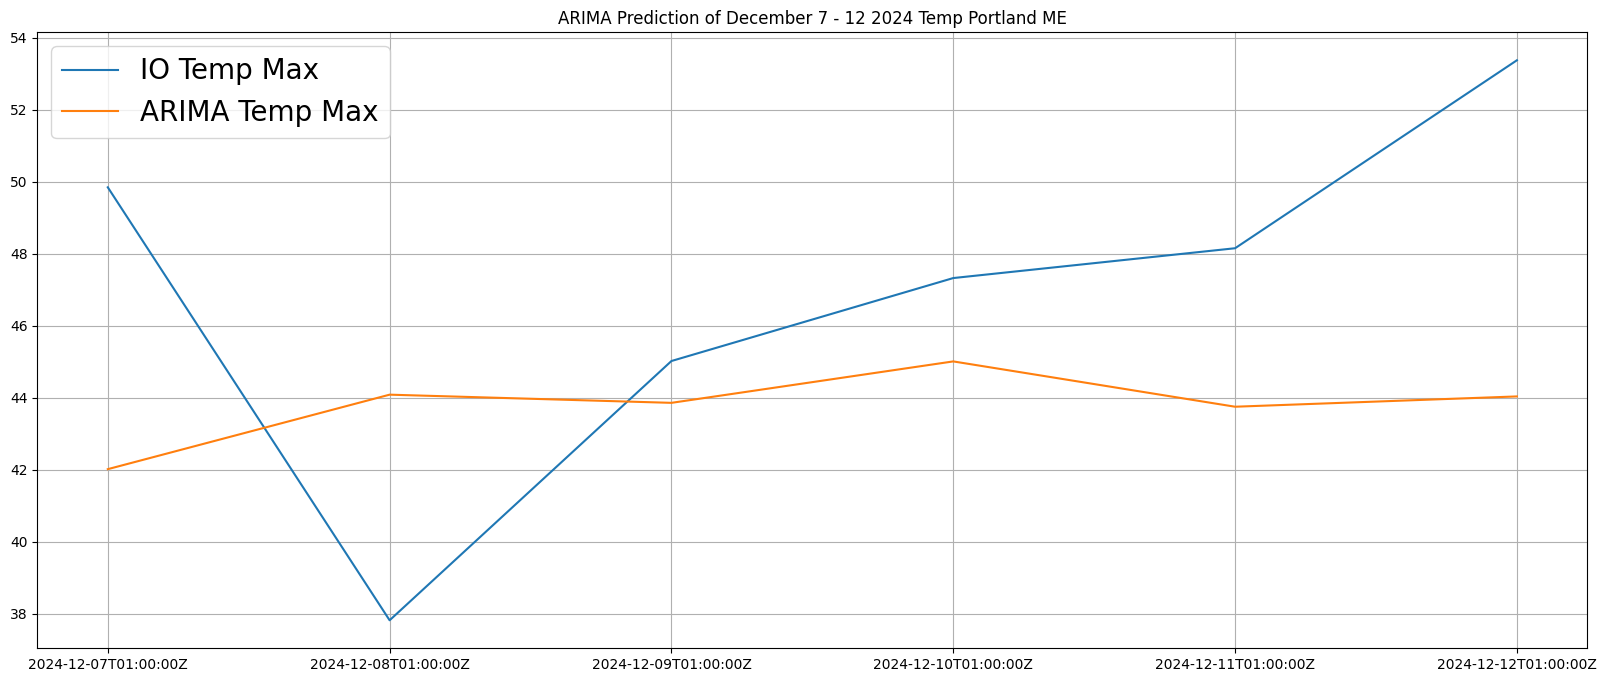

In [199]:
# Plot our model prediction of the next 5 days ve Tomorrow IOs own forecast
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(IOdata["time"], temps, label = "IO Temp Max")
plt.plot(IOdata["time"], forecastDec5, label = "ARIMA Temp Max")
plt.title("ARIMA Prediction of December 7 - 12 2024 Temp Portland ME")
plt.legend(fontsize = 20)
plt.show()

In [19]:
# Lets see how an extended prediction looks
model = SARIMAX(merge["TMAX"][:len(merge)], order = (5, 1, 0), seasonal_order =(2, 1, 1, 30)) 

result = model.fit() 

forecastExtend = result.predict(start = len(merge),  end = len(merge)+365,  typ = 'linear')


g:\Data_SCIENCE\DATA_SCIENCE_6150\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [22]:
dates = []
time = pd.Timestamp(year = 2024, day = 27, month = 11) # Data ends here so we begin our forcast here
for x in forecastExtend: # Get dates for each forcasted day
    dates.append(time)
    time = time + timedelta(days=1)

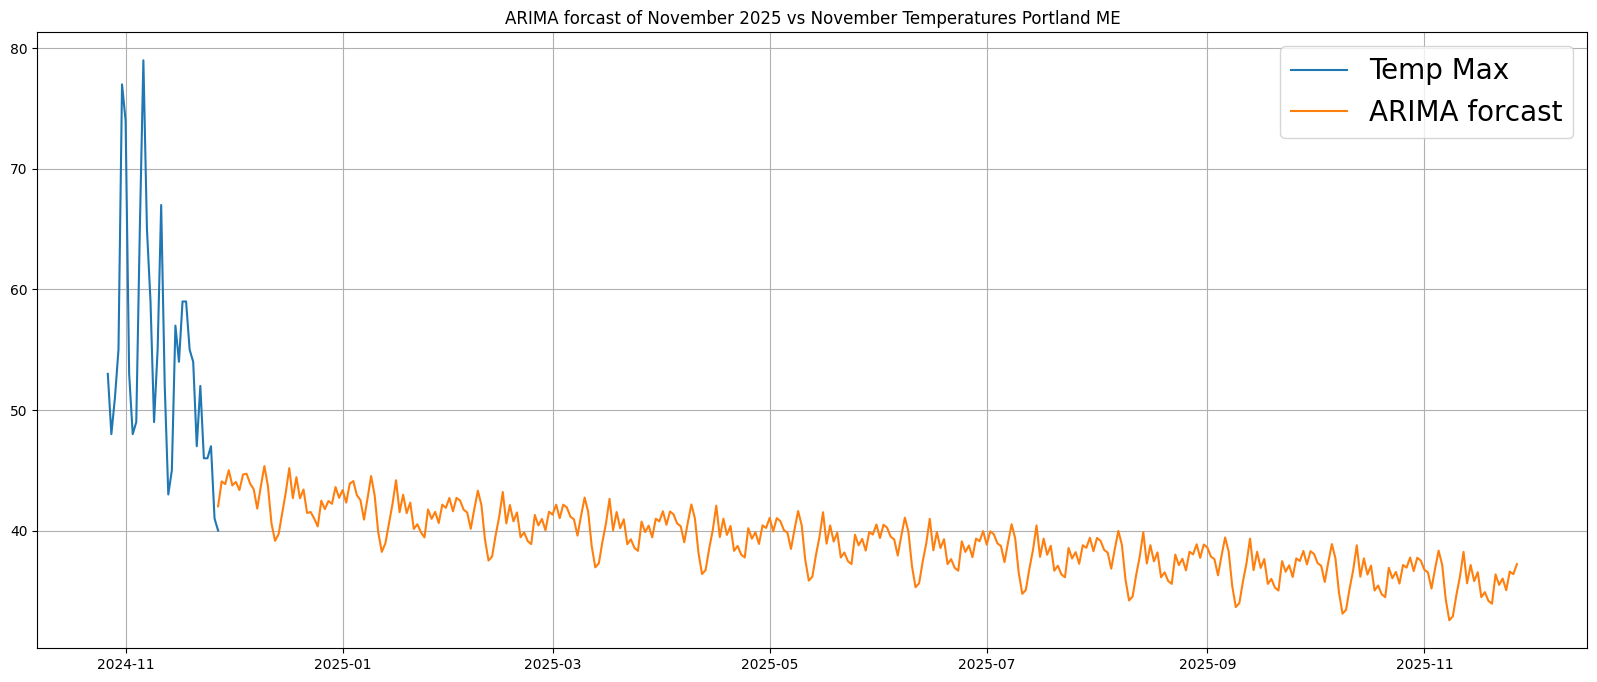

In [21]:
fig, ax = plt.subplots(1, figsize = (20, 8))
ax.grid()
plt.plot(merge["DATE"][665:len(merge)], merge["TMAX"][665:len(merge)],label = "Temp Max") 
plt.plot(dates,forecastExtend, label = "ARIMA forcast")
plt.title("ARIMA forcast of November 2025 vs November Temperatures Portland ME")
plt.legend(fontsize = 20)
plt.show()